# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | klyuchi
Processing Record 3 of Set 1 | leava
Processing Record 4 of Set 1 | male
Processing Record 5 of Set 1 | queenstown
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | newman
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | tazacorte
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | keflavik
Processing Record 14 of Set 1 | soio
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | saint-tropez
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | chilliwack
Processing Record 19 of Set 1 | dunedin
Processing Record 20 of Set 1 | acapulco de juarez
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | blackmans bay
Process

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,17.85,98,91,5.33,SH,1736355532
1,klyuchi,52.2667,79.1667,-18.58,95,62,4.28,RU,1736355587
2,leava,-14.3000,-178.1667,28.27,81,100,12.67,WF,1736356045
3,male,4.1748,73.5089,27.30,79,99,6.12,MV,1736356046
4,queenstown,-31.8976,26.8753,19.91,54,54,8.85,ZA,1736356048


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,17.85,98,91,5.33,SH,1736355532
1,klyuchi,52.2667,79.1667,-18.58,95,62,4.28,RU,1736355587
2,leava,-14.3000,-178.1667,28.27,81,100,12.67,WF,1736356045
3,male,4.1748,73.5089,27.30,79,99,6.12,MV,1736356046
4,queenstown,-31.8976,26.8753,19.91,54,54,8.85,ZA,1736356048


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

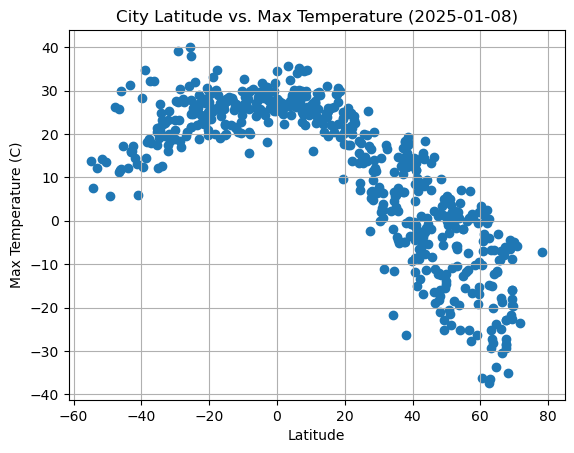

In [28]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df['Lat']
y_values=city_data_df['Max Temp']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.title(f"City Latitude vs. Max Temperature (2025-01-08)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

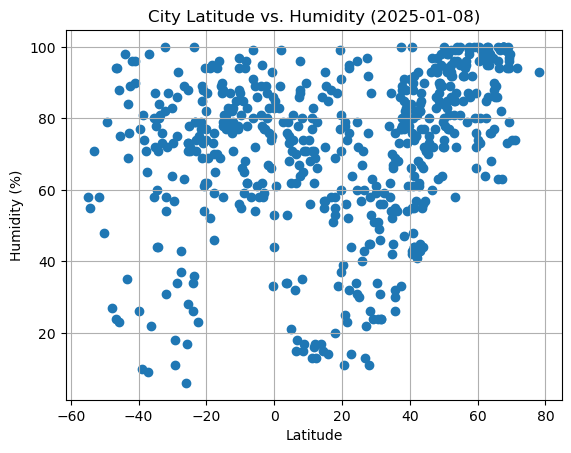

In [29]:
# Build scatter plot for latitude vs. humidity
x_values=city_data_df['Lat']
y_values=city_data_df['Humidity']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"City Latitude vs. Humidity (2025-01-08)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

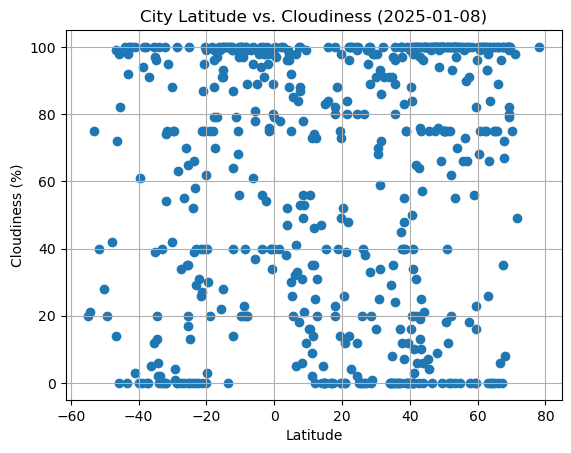

In [30]:
# Build the scatter plots for latitude vs. cloudiness
x_values=city_data_df['Lat']
y_values=city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"City Latitude vs. Cloudiness (2025-01-08)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

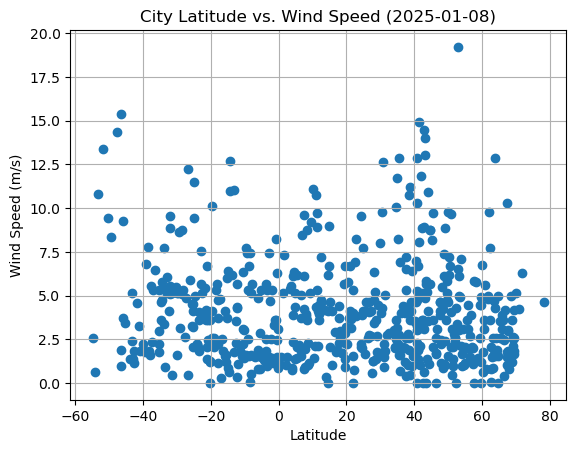

In [31]:
# Build the scatter plots for latitude vs. wind speed
x_values=city_data_df['Lat']
y_values=city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.title(f"City Latitude vs. Wind Speed (2025-01-08)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,klyuchi,52.2667,79.1667,-18.58,95,62,4.28,RU,1736355587
3,male,4.1748,73.5089,27.30,79,99,6.12,MV,1736356046
5,ilulissat,69.2167,-51.1000,-8.75,79,100,2.10,GL,1736355501
6,newman,37.3138,-121.0208,6.69,77,100,1.21,US,1736356050
9,jamestown,42.0970,-79.2353,-7.77,81,100,5.14,US,1736355588


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,17.85,98,91,5.33,SH,1736355532
2,leava,-14.3000,-178.1667,28.27,81,100,12.67,WF,1736356045
4,queenstown,-31.8976,26.8753,19.91,54,54,8.85,ZA,1736356048
7,port-aux-francais,-49.3500,70.2167,5.76,79,20,8.32,TF,1736355518
8,puerto natales,-51.7236,-72.4875,14.25,58,40,13.38,CL,1736355593


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.733077226024915


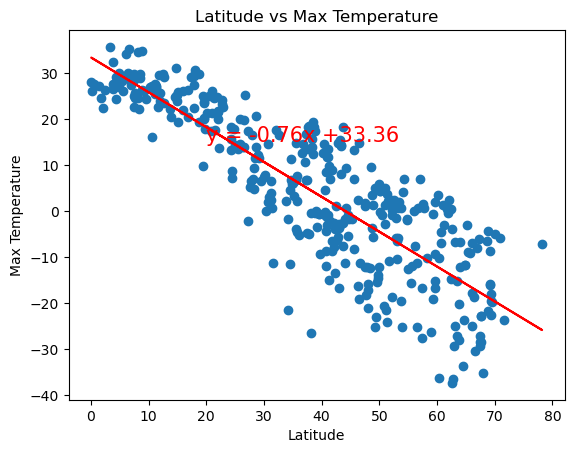

In [35]:
# Linear regression on Northern Hemisphere
# Perform a linear regression on temperature vs. latitude
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temperature in Northern Hemisphere")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

In [37]:
#Discussion about Linear Relationship for Graph Above
print("Discussion about the linear relationship: There is a very clear inverse relationship between Latitude and Max Temperature in the Northern Hemisphere, as exhibited by the high R squared value. This is expected as the further north you move, the colder it will get")

Discussion about the linear relationship: There is a very clear inverse relationship between Latitude and Max Temperature in the Northern Hemisphere, as exhibited by the high R squared value. This is expected as the further north you move, the colder it will get


The r^2-value is: 0.2931070888236415


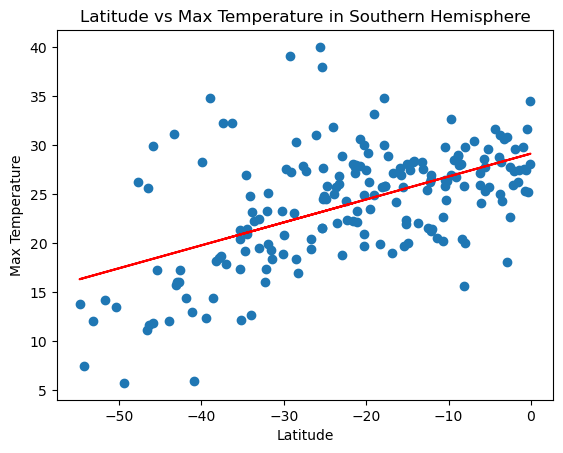

In [40]:
# Linear regression on Southern Hemisphere
# Perform a linear regression on temperature vs. latitude
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temperature in Southern Hemisphere")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

In [1]:
Discussion about the linear relationship: 
Even though the r squared value is low, there is a clear positive relationship between Latitude and Max Temperature in the Northern Hemisphere.  
This is expected as the further south you move (higher negative numbers), the colder it will get

SyntaxError: invalid syntax (1844585808.py, line 1)

In [41]:
#Discussion about Linear Relationship for Graph Above
print("Discussion about the linear relationship: Even though the r squared value is low, there is a clear positive relationship between Latitude and Max Temperature in the Northern Hemisphere.  This is expected as the further south you move (higher negative numbers), the colder it will get")

Discussion about the linear relationship: Even though the r squared value is low, there is a clear positive relationship between Latitude and Max Temperature in the Northern Hemisphere.  This is expected as the further south you move (higher negative numbers), the colder it will get


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.24541437007006167


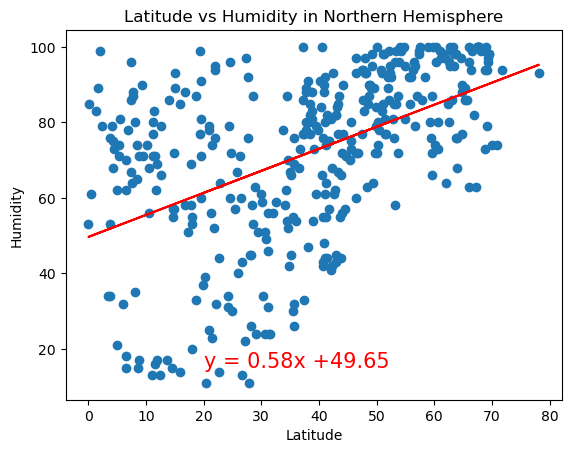

In [42]:
# Northern Hemisphere
# Perform a linear regression on Humidity vs. latitude
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity in Northern Hemisphere")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

In [45]:
#Discussion about Linear Relationship for Graph Above
print("Discussion about the linear relationship: The positive relationship between humidity and latitude indicates the further north you go, the higher the humidity.  The low r squared value indicates these two variables aren't very highly correlated, so that is not likely to be the case.")

Discussion about the linear relationship: The positive relationship between humidity and latitude indicates the further north you go, the higher the humidity.  The low r squared value indicates these two variables aren't very highly correlated, so that is not likely to be the case.


The r^2-value is: 0.04786503085264764


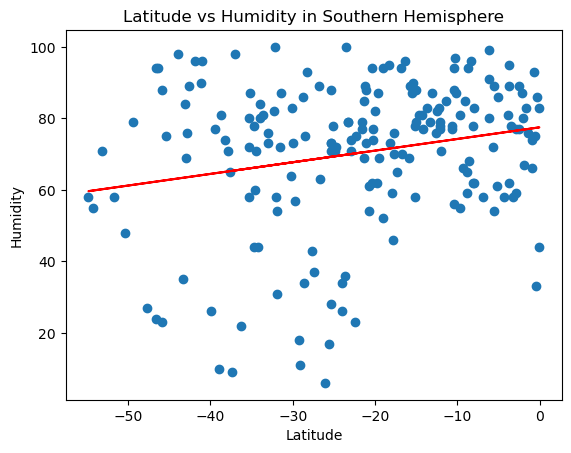

In [43]:
# Southern Hemisphere
# Perform a linear regression on temperature vs. latitude
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity in Southern Hemisphere")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

In [46]:
#Discussion about Linear Relationship for Graph Above
print("Discussion about the linear relationship: There is a weak positive relationship between humidity and Latitude for the southern hemisphere.  The R squared value is so low that the only conclusion you can draw is that these two variables are not correlated.")

Discussion about the linear relationship: There is a weak positive relationship between humidity and Latitude for the southern hemisphere.  The R squared value is so low that the only conclusion you can draw is that these two variables are not correlated.


The r^2-value is: 0.047755376723752414


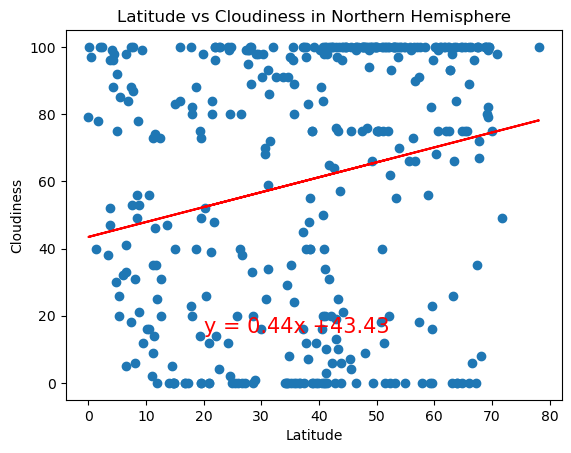

In [48]:
# Northern Hemisphere
# Perform a linear regression on Cloudiness vs. latitude
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness in Northern Hemisphere")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
#Discussion about Linear Relationship for Graph Above
print("Discussion about the linear relationship:The R squared value is so low that there is no correlation between these two variables")

The r^2-value is: 0.09021905065063925


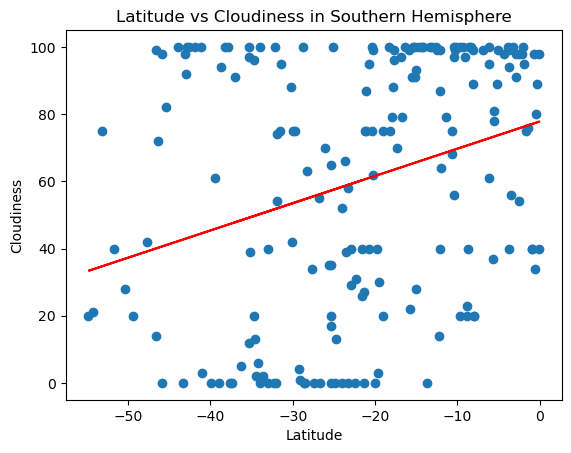

In [49]:
# Southern Hemisphere
# Perform a linear regression on Cloudiness vs. latitude
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness in Southern Hemisphere")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
#Discussion about Linear Relationship for Graph Above
print("Discussion about the linear relationship:The R squared value is so low that there is no correlation between these two variables")

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.002422796054601389


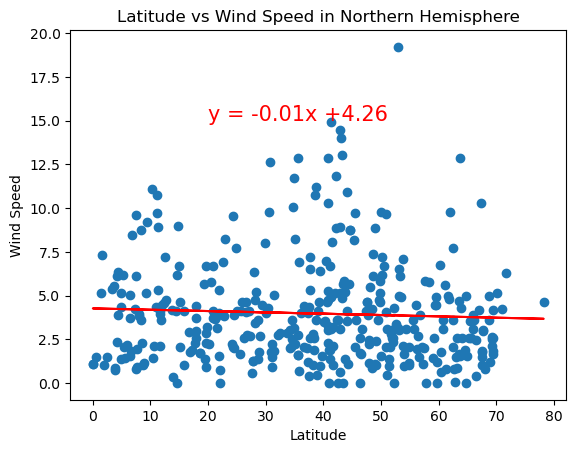

In [47]:
# Northern Hemisphere
# Perform a linear regression on Wind Speed vs. latitude
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed in Northern Hemisphere")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
#Discussion about Linear Relationship for Graph Above
print("Discussion about the linear relationship:The R squared value is so low that there is no correlation between these two variables")

The r^2-value is: 0.060120547641960155


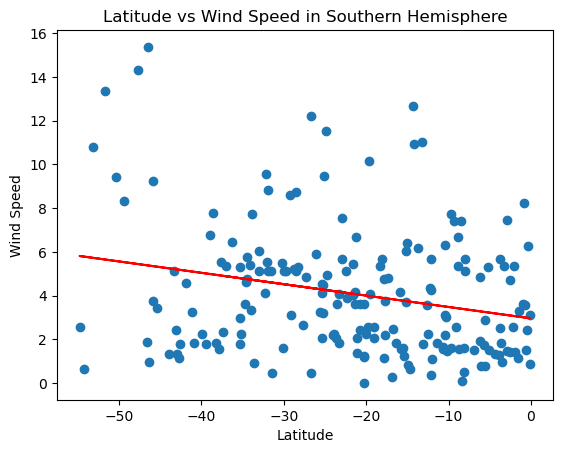

In [50]:
# Southern Hemisphere
# Perform a linear regression on Wind Speed vs. latitude
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed in Southern Hemisphere")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
#Discussion about Linear Relationship for Graph Above
print("Discussion about the linear relationship:The R squared value is so low that there is no correlation between these two variables")